In [1]:
import pandas as pd
import IPython
import matplotlib.pyplot as plt

from scipy.io.wavfile import read

import seaborn as sns
import wave

In [2]:
FILES_PATH = './'
SAMPLES_PATH = './TinySOL/'
#SAMPLES_PATH = './OrchideaSOL2020_release/OrchideaSOL2020/'

In [3]:
df = pd.read_csv(FILES_PATH+'TinySOL_metadata_updated.csv')
#df = pd.read_csv(FILES_PATH+'OrchideaSOL_metadata.csv')

In [4]:
df.describe()

Fold     Pitch ID  Dynamics ID  Instance ID  \
count  1726.000000  1726.000000  1726.000000  1726.000000   
mean      2.030127    64.887601     1.989571     0.863268   
std       1.405668    16.918461     1.598153     1.128223   
min       0.000000    28.000000     0.000000     0.000000   
25%       1.000000    52.000000     0.000000     0.000000   
50%       2.000000    65.000000     2.000000     0.000000   
75%       3.000000    77.000000     4.000000     2.000000   
max       4.000000   108.000000     4.000000     5.000000   

       String ID (if applicable)        nframes  Duration(s)       Octave  
count                 713.000000    1726.000000  1726.000000  1726.000000  
mean                    2.420757  297101.446118     6.736994     3.956547  
std                     1.127898   67162.547872     1.522960     1.441364  
min                     1.000000   57999.000000     1.315170     1.000000  
25%                     1.000000  267412.500000     6.063776     3.000000  
50%                     2.000000  300980.000000     6.824943     4.000000  
75%                     3.000000  334730.750000     7.590266     5.000000  
max                     4.000000  693632.000000    15.728617     8.000000

In [5]:
df.columns

Index(['Path', 'Fold', 'Family', 'Instrument (abbr.)', 'Instrument (in full)',
       'Technique (abbr.)', 'Technique (in full)', 'Pitch', 'Pitch ID',
       'Dynamics', 'Dynamics ID', 'Instance ID', 'String ID (if applicable)',
       'Needed digital retuning', 'nframes', 'Duration(s)', 'Octave'],
      dtype='object')

In [6]:
num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 1726
Number of columns: 17


In [7]:
# List unique values in a specific column (e.g., 'Family')
unique_families = df['Family'].unique()
#unique_families = df['Family (abbr.)'].unique()
print("\nUnique values in the 'Family (abbr.)' column:")
print(unique_families)


Unique values in the 'Family (abbr.)' column:
['Brass' 'Keyboards' 'Strings' 'Winds']


In [8]:
# List unique values in a specific column (e.g., 'Family')
unique_instrument = df['Instrument (in full)'].unique()
print("\nUnique values in the 'Instrument (in full)' column:")
print(unique_instrument)


Unique values in the 'Instrument (in full)' column:
['Bass Tuba' 'French Horn' 'Trombone' 'Trumpet in C' 'Accordion' 'Cello'
 'Contrabass' 'Viola' 'Violin' 'Alto Saxophone' 'Bassoon' 'Clarinet in Bb'
 'Flute' 'Oboe']


In [9]:
# List unique values in a specific column (e.g., 'Family')
unique_pitch = df['Pitch'].unique()
print("\nUnique values in the Pitch column:")
print(unique_pitch)


Unique values in the Pitch column:
['G1' 'A1' 'B1' 'C2' 'D2' 'E2' 'F2' 'G2' 'A2' 'B2' 'C3' 'D3' 'E3' 'F3'
 'G3' 'A3' 'B3' 'C4' 'D4' 'E4' 'F4' 'G4' 'A4' 'B4' 'C5' 'D5' 'E5' 'F5'
 'G5' 'A5' 'B5' 'C6' 'D6' 'E1' 'F1' 'E6' 'F6' 'G6' 'A6' 'B6' 'C7' 'D7'
 'E7' 'F7' 'G7' 'A7' 'B7' 'C8']


In [10]:
# List unique values in a specific column (e.g., 'Family')
unique_dynamics = df['Dynamics'].unique()
print("\nUnique values in the Dynamics column:")
print(unique_dynamics)


Unique values in the Dynamics column:
['pp' 'mf' 'ff' 'p']


In [11]:
filtered_df = df[df['Needed digital retuning'] == True]
print("\nRows where 'Needed digital retuning' is TRUE:")
print(filtered_df)


Rows where 'Needed digital retuning' is TRUE:
                                                   Path  Fold Family  \
0     Brass/Bass_Tuba/ordinario/BTb-ord-G1-pp-N-R100...     4  Brass   
1     Brass/Bass_Tuba/ordinario/BTb-ord-A1-pp-N-T23d...     2  Brass   
3     Brass/Bass_Tuba/ordinario/BTb-ord-C2-pp-N-T13d...     1  Brass   
4     Brass/Bass_Tuba/ordinario/BTb-ord-D2-pp-N-T18u...     1  Brass   
5     Brass/Bass_Tuba/ordinario/BTb-ord-E2-pp-N-T25u...     1  Brass   
...                                                 ...   ...    ...   
1718       Winds/Oboe/ordinario/Ob-ord-A5-ff-N-T19u.wav     2  Winds   
1719       Winds/Oboe/ordinario/Ob-ord-B5-ff-N-T11u.wav     3  Winds   
1721      Winds/Oboe/ordinario/Ob-ord-D6-ff-N-R100u.wav     4  Winds   
1724       Winds/Oboe/ordinario/Ob-ord-G6-ff-N-T16u.wav     0  Winds   
1725       Winds/Oboe/ordinario/Ob-ord-A6-ff-N-T18u.wav     1  Winds   

     Instrument (abbr.) Instrument (in full) Technique (abbr.)  \
0                   BT

In [14]:
filtered_df.count()

Path                         367
Fold                         367
Family                       367
Instrument (abbr.)           367
Instrument (in full)         367
Technique (abbr.)            367
Technique (in full)          367
Pitch                        367
Pitch ID                     367
Dynamics                     367
Dynamics ID                  367
Instance ID                  367
String ID (if applicable)    161
Needed digital retuning      367
nframes                      367
Duration(s)                  367
Octave                       367
dtype: int64

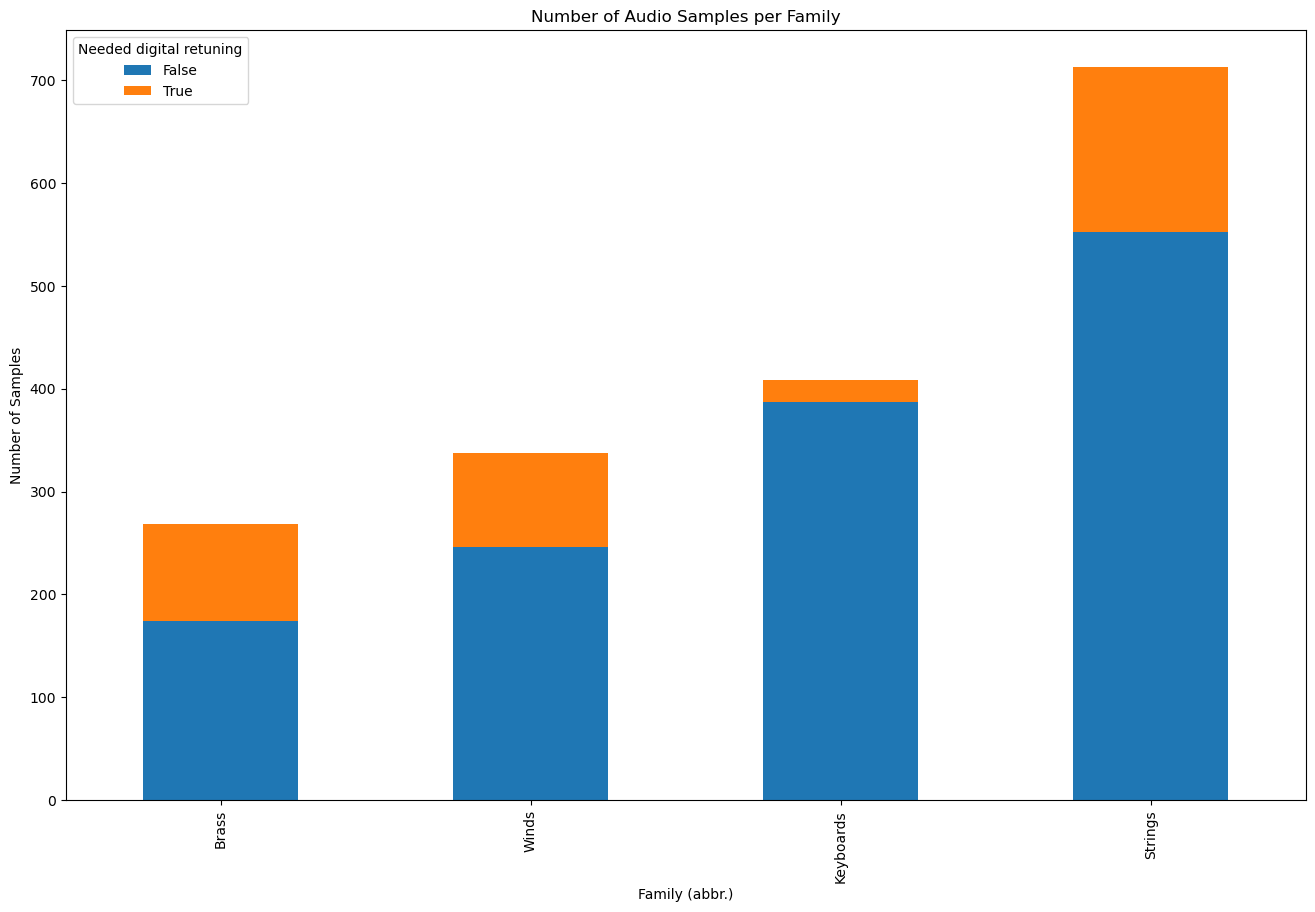

In [19]:
# Group data by 'Family' and 'Needed digital retuning' columns and count the samples in each category
category_group = df.groupby(['Family', 'Needed digital retuning']).size().unstack()

# Reorder the rows based on the sum of samples per category
category_group = category_group.reindex(category_group.sum(axis=1).sort_values().index)

# Create a stacked bar chart
plot = category_group.plot(kind='bar', stacked=True, title="Number of Audio Samples per Family", figsize=(16, 10))

# Set labels for the x and y axes
plot.set_xlabel("Family (abbr.)")
plot.set_ylabel("Number of Samples")

# Show the plot
plt.show()

In [20]:
category_group

Needed digital retuning  False  True 
Family                               
Brass                      174     94
Winds                      246     91
Keyboards                  387     21
Strings                    552    161

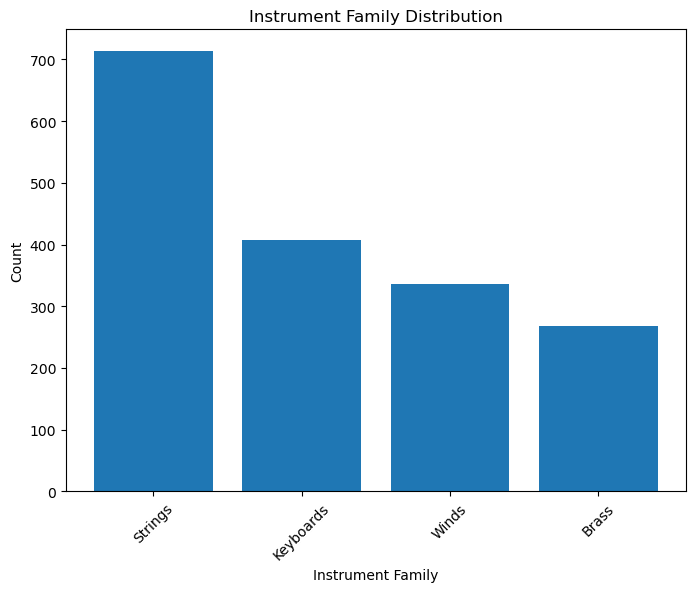

In [22]:
# Example visualization: Bar chart of instrument families
family_counts = df['Family'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(family_counts.index, family_counts.values)
plt.xlabel('Instrument Family')
plt.ylabel('Count')
plt.title('Instrument Family Distribution')
plt.xticks(rotation=45)
plt.show()


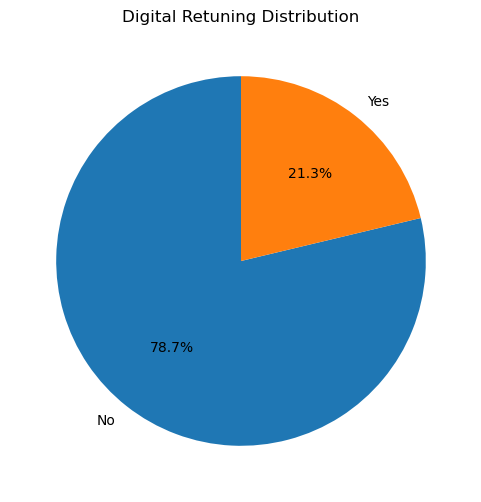

In [23]:
# Example visualization: Pie chart of digital retuning
retuning_counts = df['Needed digital retuning'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(retuning_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Digital Retuning Distribution')
plt.show()

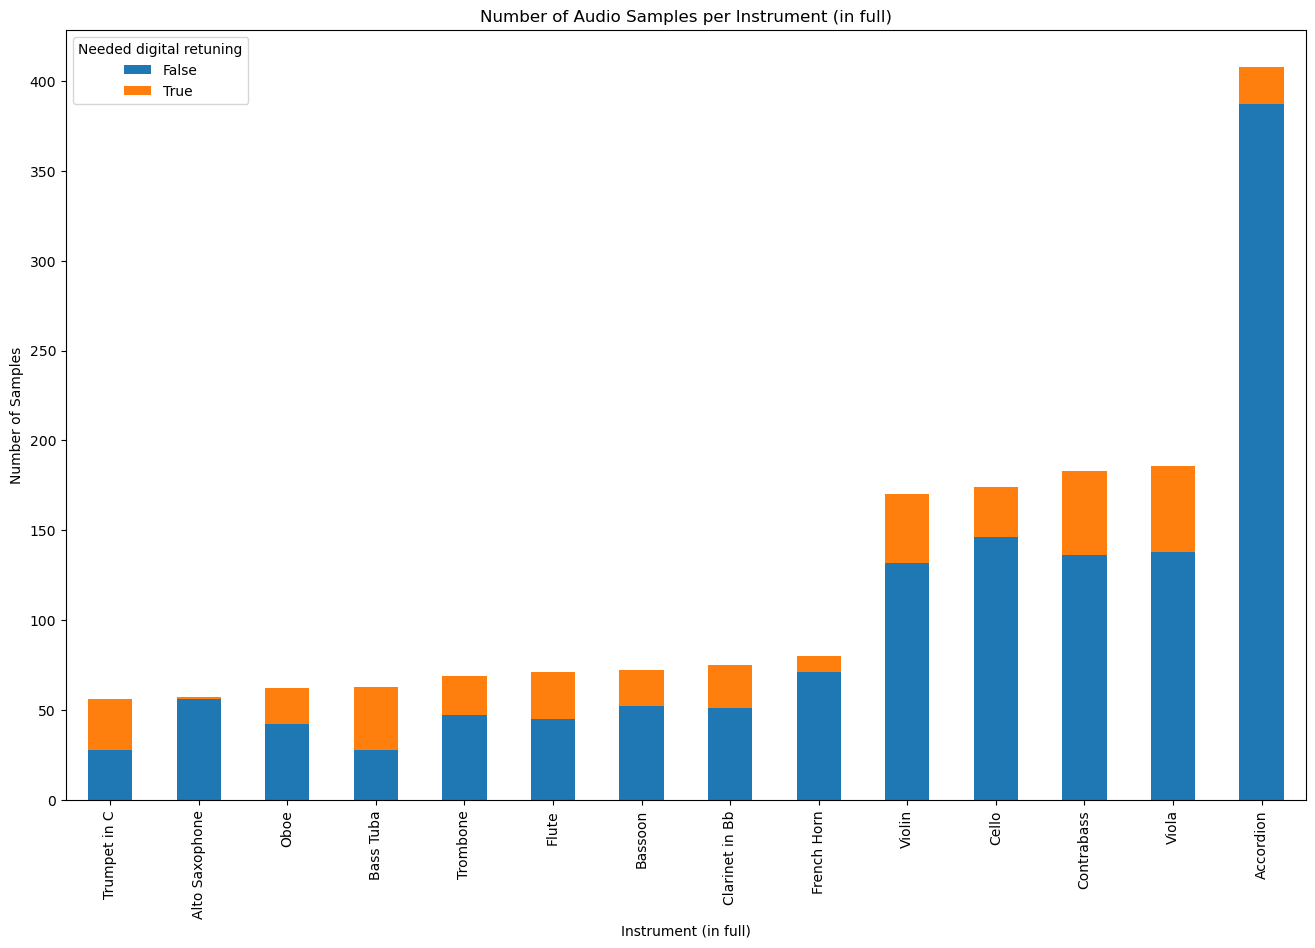

In [24]:
# Group data by 'Instrument (in full)' and 'Needed digital retuning' columns and count the samples in each category
category_group = df.groupby(['Instrument (in full)', 'Needed digital retuning']).size().unstack()

# Reorder the rows based on the sum of samples per category
category_group = category_group.reindex(category_group.sum(axis=1).sort_values().index)

# Create a stacked bar chart
plot = category_group.plot(kind='bar', stacked=True, title="Number of Audio Samples per Instrument (in full)", figsize=(16, 10))

# Set labels for the x and y axes
plot.set_xlabel("Instrument (in full)")
plot.set_ylabel("Number of Samples")

# Show the plot
plt.show()

In [25]:
df['Path']

0       Brass/Bass_Tuba/ordinario/BTb-ord-G1-pp-N-R100...
1       Brass/Bass_Tuba/ordinario/BTb-ord-A1-pp-N-T23d...
2         Brass/Bass_Tuba/ordinario/BTb-ord-B1-pp-N-N.wav
3       Brass/Bass_Tuba/ordinario/BTb-ord-C2-pp-N-T13d...
4       Brass/Bass_Tuba/ordinario/BTb-ord-D2-pp-N-T18u...
                              ...                        
1721        Winds/Oboe/ordinario/Ob-ord-D6-ff-N-R100u.wav
1722            Winds/Oboe/ordinario/Ob-ord-E6-ff-N-N.wav
1723            Winds/Oboe/ordinario/Ob-ord-F6-ff-N-N.wav
1724         Winds/Oboe/ordinario/Ob-ord-G6-ff-N-T16u.wav
1725         Winds/Oboe/ordinario/Ob-ord-A6-ff-N-T18u.wav
Name: Path, Length: 1726, dtype: object

In [26]:
from IPython.display import Audio

# Display audio players for the first 10 records
for index, row in df.head(10).iterrows():
    audio_path = SAMPLES_PATH + row['Path']
    print(audio_path)
    audio_player = Audio(audio_path)
    display(audio_player)


./TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-G1-pp-N-R100u.wav


./TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-A1-pp-N-T23d.wav


./TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-B1-pp-N-N.wav


./TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-C2-pp-N-T13d.wav


./TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-D2-pp-N-T18u.wav


./TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-E2-pp-N-T25u.wav


./TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-F2-pp-N-T25u_R100u.wav


./TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-G2-pp-N-N.wav


./TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-A2-pp-N-T15u.wav


./TinySOL/Brass/Bass_Tuba/ordinario/BTb-ord-B2-pp-N-T11d.wav


In [27]:
test_audio_file_path = SAMPLES_PATH + df['Path'][250]
test_audio_file_path

'./TinySOL/Brass/Trumpet_C/ordinario/TpC-ord-G3-ff-N-T21u.wav'

In [31]:
IPython.display.Audio(test_audio_file_path)

In [32]:
test_audio_file_path = SAMPLES_PATH + df['Path'][1000]
test_audio_file_path

'./TinySOL/Strings/Contrabass/ordinario/Cb-ord-B2-ff-3c-T17u.wav'

In [33]:
IPython.display.Audio(test_audio_file_path)

In [34]:
test_audio_file_path = SAMPLES_PATH + df['Path'][1500]
test_audio_file_path

'./TinySOL/Winds/Bassoon/ordinario/Bn-ord-A2-ff-N-T11d.wav'

In [35]:
IPython.display.Audio(test_audio_file_path)





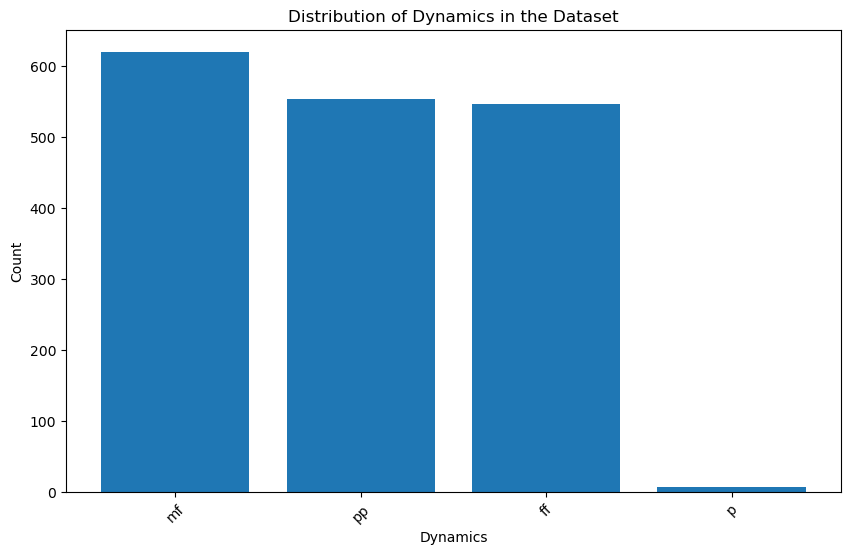

In [36]:
dynamic_counts = df['Dynamics'].value_counts()

# Create a bar chart to visualize the distribution of dynamics
plt.figure(figsize=(10, 6))
plt.bar(dynamic_counts.index, dynamic_counts.values)
plt.xlabel('Dynamics')
plt.ylabel('Count')
plt.title('Distribution of Dynamics in the Dataset')
plt.xticks(rotation=45)
plt.show()

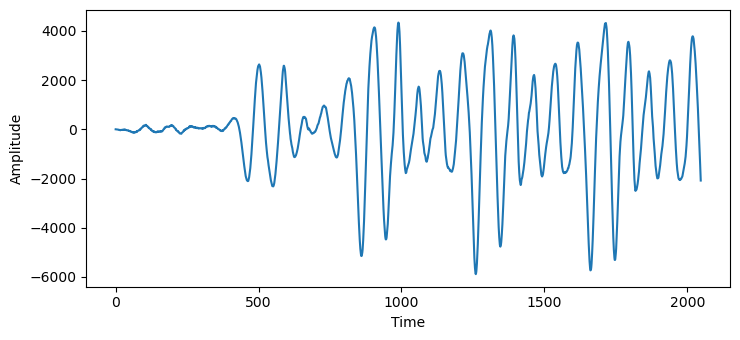

In [37]:
##waveforms, spectrograms, scatter plots, histograms, or heatmaps

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

input_data = read(test_audio_file_path)
audio = input_data[1]
audio = input_data[1]

plt.plot(audio[0:2048])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

(array([[8.44299369e+02, 1.04999872e+05, 9.56417608e+04, ...,
         8.52569475e+01, 2.38123870e+00, 7.39638931e+01],
        [4.02777046e+03, 1.03550577e+05, 4.19408426e+06, ...,
         2.12121536e+02, 3.48339918e+01, 8.23334759e+01],
        [1.88085960e+05, 1.80575237e+05, 6.20137445e+06, ...,
         3.88725449e+02, 2.13209716e+02, 8.35600052e+01],
        ...,
        [9.80238507e-03, 6.57610246e-02, 8.69759156e-01, ...,
         5.66416653e-01, 5.70590098e-01, 1.57492487e-02],
        [2.48725255e-02, 1.06630609e-01, 3.13606773e-01, ...,
         9.20850926e-01, 8.64732533e-02, 1.67796596e-03],
        [1.19571612e-03, 2.93279668e-01, 2.62538629e-03, ...,
         2.85265224e-01, 2.18184614e-03, 5.67943155e-03]]),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.1484375, 0.15625  , 0.

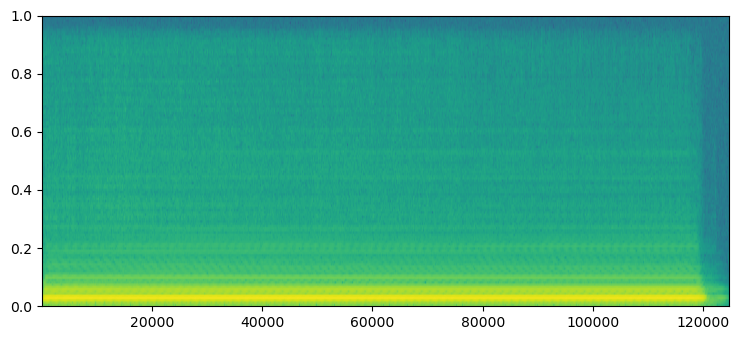

In [38]:
plt.specgram(audio)

In [ ]:
df.shape[0]


In [ ]:
df.iloc(0)


In [ ]:
def get_nframes(path):
    try:
        with wave.open(path, 'rb') as wf:
            return wf.getnframes()
    except Exception as e:
        print(f"Error reading {path}: {str(e)}")
        return None

# Calculate the number of audio frames for each row in the DataFrame
df['nframes'] = df['Path'].apply(lambda path: get_nframes(SAMPLES_PATH + path))

# Create a violin plot to visualize the distribution of audio frames per label
_, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(ax=ax, x="Family (abbr.)", y="nframes", data=df)
plt.xticks(rotation=90)
plt.title('Distribution of audio frames, per Family', fontsize=16)
plt.show()

In [ ]:
df['nframes'].hist(bins=100)


In [ ]:
# Function to calculate the number of audio frames
def get_nframes(path):
    try:
        with wave.open(path, 'rb') as wf:
            return wf.getnframes()
    except Exception as e:
        print(f"Error reading {path}: {str(e)}")
        return None

# Calculate the number of audio frames for each row in the DataFrame
df['nframes'] = df['Path'].apply(lambda path: get_nframes(SAMPLES_PATH + path))

# Create histograms for frame length distribution in both training and test datasets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
df['nframes'].hist(bins=100)
#axes[1].set_title('Frame Length Distribution in Test')
plt.suptitle('Frame Length Distribution in Train and Test', ha='center', fontsize='large')
plt.show()


In [ ]:
import librosa
import librosa.display
import numpy as np
# Load an audio file (replace 'your_audio_file.wav' with the path to your audio file)
audio_file = test_audio_file_path
y, sr = librosa.load(audio_file)

print("sample rate:",sr)

# Generate the spectrogram
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Create a figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Display the spectrogram on the axis
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')

# Add labels and a color bar
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
df

In [ ]:
# Extract lists of instruments by family, scale, and dynamic
instruments_by_family = df.groupby("Family (abbr.)")["Instrument (in full)"].unique()
instruments_by_pitch = df.groupby("Pitch")["Instrument (in full)"].unique()
instruments_by_dynamic = df.groupby("Dynamics")["Instrument (in full)"].unique()

# Print the lists
print("Instruments by Family:")
for family, instruments in instruments_by_family.items():
    print(f"{family}: {', '.join(instruments)}")

print("\nInstruments by Pitch:")
for pitch, instruments in instruments_by_pitch.items():
    print(f"{pitch}: {', '.join(instruments)}")

print("\nInstruments by Dynamic:")
for dynamic, instruments in instruments_by_dynamic.items():
    print(f"{dynamic}: {', '.join(instruments)}")

In [ ]:
import soundfile as sf

def get_audio_duration(path):
    try:
        audio_data, samplerate = sf.read('./TinySOL/'+path)
        duration = len(audio_data) / float(samplerate)
        return duration
    except Exception as e:
        return None  # Handle any exceptions when reading the file

# Assuming your metadata DataFrame is named 'metadata'
df['Duration(s)'] = df['Path'].apply(get_audio_duration)

In [ ]:
df

In [ ]:
df['Octave'] = df['Pitch'].str.extract('(\d+)')

In [ ]:
# Use this block to remove files with # Pitch

df = df[~df['Pitch'].str.contains('#')]


In [ ]:
#df.to_csv('TinySOL_metadata_updated.csv', index=False) 

In [ ]:
df["Duration(s)"]

In [ ]:
# Plot the counts of the 'Pitch' column
pitch_counts = df['Pitch'].value_counts()

# Create a bar plot
pitch_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add labels and title
plt.xlabel('Pitch')
plt.ylabel('Count')
plt.title('Pitch Counts in the Dataset')

# Show the plot
plt.show()

In [ ]:
pitch_counts = df['Octave'].value_counts()

# Create a bar plot
pitch_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add labels and title
plt.xlabel('Octave')
plt.ylabel('Count')
plt.title('Octave Counts in the Dataset')

# Show the plot
plt.show()

In [ ]:
# Calculate pitch counts
pitch_octave_counts = filtered_df.groupby('Octave')['Pitch'].count()

# Sort the DataFrame by octave
pitch_octave_counts_sorted = pitch_counts.sort_index(ascending=True)

# Create a bar plot
pitch_octave_counts_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add labels and title
plt.xlabel('Octave')
plt.ylabel('Count')
plt.title('Pitch Counts by Octave in the Dataset')

# Show the plot
plt.show()

In [ ]:
pitch_octave_counts_sorted

In [ ]:
# Filter the DataFrame for Octaves 2, 3, 4, and 5
selected_octaves = ['2', '3', '4', '5']
df = df[df['Octave'].isin(selected_octaves)]

# Display items and count by pitch
pitch_counts_by_octave = df.groupby(['Octave', 'Pitch']).size().reset_index(name='Count')

In [ ]:
# pitch_counts_by_octave.to_csv("pitch.csv")

In [ ]:
df

In [ ]:
pitch_family_counts = filtered_df.groupby(['Pitch', 'Family (abbr.)']).size().reset_index(name='Count')
pivot_df = pitch_family_counts.pivot(index='Pitch', columns='Family (abbr.)', values='Count').fillna(0)
pitch_family_counts_sorted = pitch_family_counts.sort_values(by=['Pitch', 'Count'], ascending=[True, False])
pivot_df = pitch_family_counts_sorted.pivot(index='Pitch', columns='Family (abbr.)', values='Count').fillna(0)

# Create a stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Pitch')
plt.ylabel('Count')
plt.title('Pitch Counts by Family')

# Show the legend
plt.legend(title='Family (abbr.)')

# Show the plot
plt.show()


In [ ]:
df['Instrument (in full)'].unique()

In [ ]:
# Filter by instrument
#filtered_df = df[(df['Instrument (in full)'] == 'Violin') & (df['Octave'].isin(['3', '4', '5']))]

# Filter by Family
filtered_df = df[(df['Family (abbr.)'] == 'Strings') & (df['Octave'].isin(['3', '4', '5']))]

In [ ]:
accordion_counts = filtered_df.groupby(['Pitch', 'Instrument (in full)']).size().reset_index(name='Count')
pivot_df = accordion_counts.pivot(index='Pitch', columns='Instrument (in full)', values='Count').fillna(0)

# Create a stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Violin')
plt.ylabel('Count')
plt.title('Violin')

# Show the legend
plt.legend(title='Violin')

# Show the plot
plt.show()


The accordion is the most balanced instrument of all, in the Octaves 3,4 and 5.

In [ ]:
#filtered_df.to_csv('Strings.csv')

In [ ]:
rounded_duration = filtered_df['Duration(s)'].round()

# Count the occurrences of rounded numbers
rounded_duration_counts = rounded_duration.value_counts()

# Sort the DataFrame by index (rounded durations)
rounded_duration_counts_sorted = rounded_duration_counts.sort_index()

# Create a bar plot
rounded_duration_counts_sorted.plot(kind='bar', figsize=(12, 8), color='skyblue')

# Add labels and title
plt.xlabel('Rounded Duration (s)')
plt.ylabel('Count')
plt.title('Rounded Duration Counts')

# Show the plot
plt.show()

In [ ]:
octaves_345_df = filtered_df[filtered_df['Octave'].isin(['3', '4', '5'])]

# Filter records with duration above 5 seconds
duration_above_5_df = octaves_345_df[octaves_345_df['Duration(s)'] >= 5]


In [ ]:
#duration_above_5_df.to_csv('Strings.csv')

In [ ]:
octaves_345_df["Dynamics"].value_counts()

In [ ]:
octaves_345_df.to_csv('OrchideaSOL_filtered.csv')

In [ ]:
octaves_345_df['Technique (in full)'].unique()

In [ ]:
octaves_345_df[octaves_345_df['Technique (in full)']=='col_legno_battuto'].to_csv('OrchideaSOL_sforzato.csv')